# Predicting Treatment Duration from Clinical Patient Records

In this study, we will work with a **clinical dataset consisting of 2,235 patient records**. Our primary goal is to **predict treatment duration based on patient data**, and the analysis will be carried out in several stages to ensure a structured, model-ready pipeline.  

---

## Exploratory Data Analysis (EDA)  
We will begin with an in-depth exploratory analysis, focusing on:  
- Data types, missing values, and unique entries.  
- Descriptive statistics to summarize key variables.  
- Visualizations that highlight meaningful **patterns and insights**, helping us understand what the data reveals and where potential signals for the target variable may exist.  

## Data Cleaning & Feature Engineering  
The next phase will be dedicated to preparing the dataset for modeling. Key steps include:  
- **Text cleaning & standardization** (e.g., lowercasing, removing inconsistencies).  
- Handling **duplicate records** to ensure data integrity.  
- **Imputation strategies** for missing values.  
- Splitting multi-value columns (e.g., comma-separated fields for diagnoses, chronic conditions, or allergies) into structured features.  

## Predictive Modeling  
Once the dataset is cleaned and engineered, we will proceed to regression-based modeling.  
The plan is as follows:  
- Train and evaluate **three machine learning algorithms**: Random Forest Regressor, Gradient Boosting Regressor, HistGradientBoosting Regressor.
-  Extend the analysis with a **deep learning model**, comparing its performance against the classical ML approaches.  
- Visualize the results and evaluate model performance to identify the most effective approach for predicting the target variable **`TedaviSuresi` (Treatment Duration)**.  

## Data Dictionary

| **Column Name**       | **Description**                                     |
|-----------------------|-----------------------------------------------------|
| **HastaNo**          | Anonymized patient ID.                              |
| **Yas**              | Age of the patient.                                 |
| **Cinsiyet**         | Gender of the patient.                              |
| **KanGrubu**         | Blood type of the patient.                          |
| **Uyruk**            | Nationality of the patient.                         |
| **KronikHastalik**   | Chronic conditions.         |
| **Bolum**            | Department/Clinic where the patient is treated.    |
| **Alerji**           | Allergies. |
| **Tanilar**          | Diagnoses given to the patient.                     |
| **TedaviAdi**        | Name of the treatment.                              |
| **TedaviSuresi**     | Treatment duration measured in sessions.            |
| **UygulamaYerleri**  | Application sites for the treatment.                |
| **UygulamaSuresi**   | Duration of the application process.                |

## Importing the necessary packages

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler

## Importing the data

In [2]:
df = pd.read_excel('Talent_Academy_Case_DT_2025.xlsx')

## EDA - Exploratory Data Analysis

In [3]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [4]:
#checking the number of columns and rows in the dataset
df.shape

(2235, 13)

In [5]:
#checking the data types in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [6]:
#checking how much missing data there is in each column
df.isnull().sum()

HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu           675
Uyruk                0
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    221
UygulamaSuresi       0
dtype: int64

In [7]:
#looking at the number of unique values. The "HastaNo" column indicates that within the dataset of 2,235 rows, there are records for 404 distinct patients
df.nunique()

HastaNo            404
Yas                 75
Cinsiyet             2
KanGrubu             8
Uyruk                5
KronikHastalik     220
Bolum               10
Alerji              38
Tanilar            367
TedaviAdi          244
TedaviSuresi        23
UygulamaYerleri     37
UygulamaSuresi      10
dtype: int64

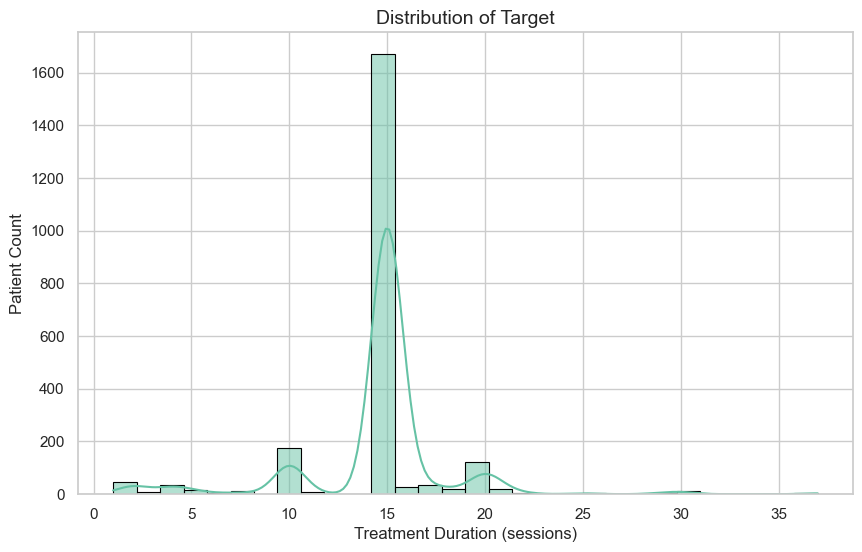

In [8]:
#converting the target variable by extracting just the number
df["TedaviSeans_Sayisi"] = df["TedaviSuresi"].str.extract(r'(\d+)').astype(float)

#style settings
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

#distribution of target variable
plt.figure()
sns.histplot(df["TedaviSeans_Sayisi"], bins=30, kde=True, edgecolor="black", linewidth=0.8)
plt.title("Distribution of Target")
plt.xlabel("Treatment Duration (sessions)")
plt.ylabel("Patient Count")
plt.show()

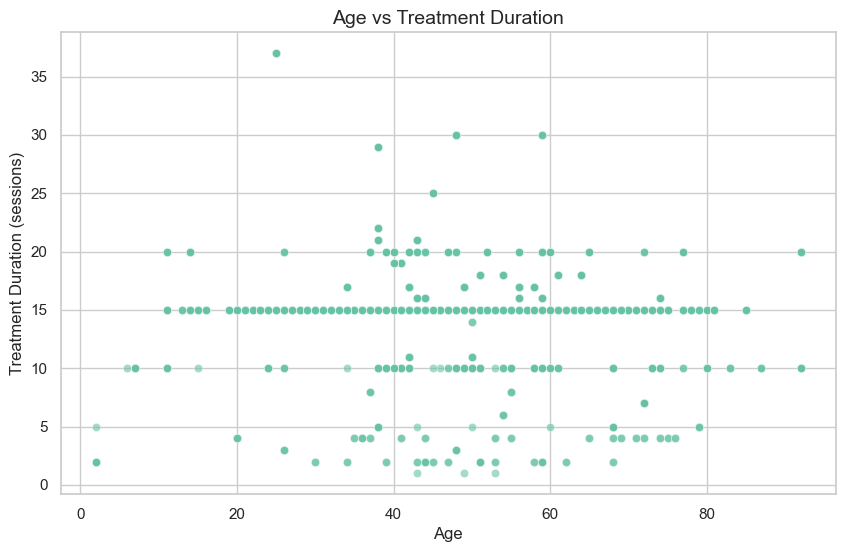

In [9]:
#age vs treatment duration
plt.figure()
sns.scatterplot(x="Yas", y="TedaviSeans_Sayisi", data=df, alpha=0.6)
plt.title("Age vs Treatment Duration")
plt.xlabel("Age")
plt.ylabel("Treatment Duration (sessions)")
plt.show()

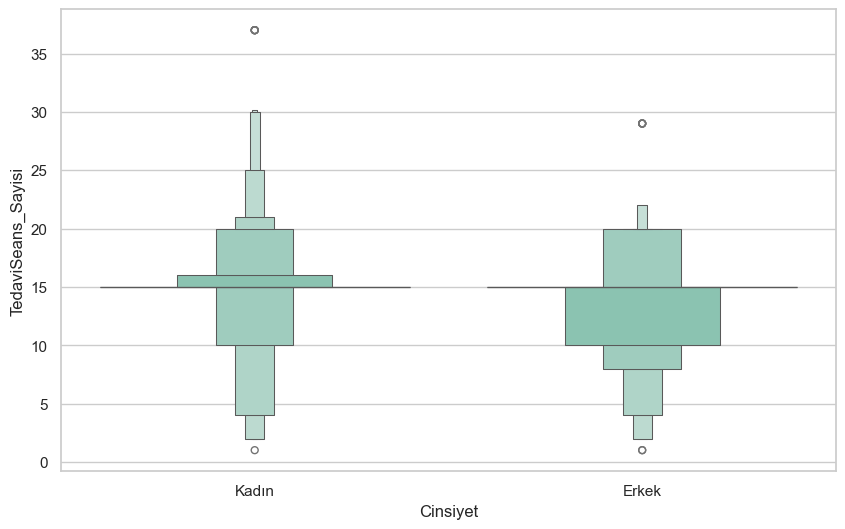

In [10]:
#gender vs treatment duration
sns.boxenplot(x="Cinsiyet", y="TedaviSeans_Sayisi", data=df);

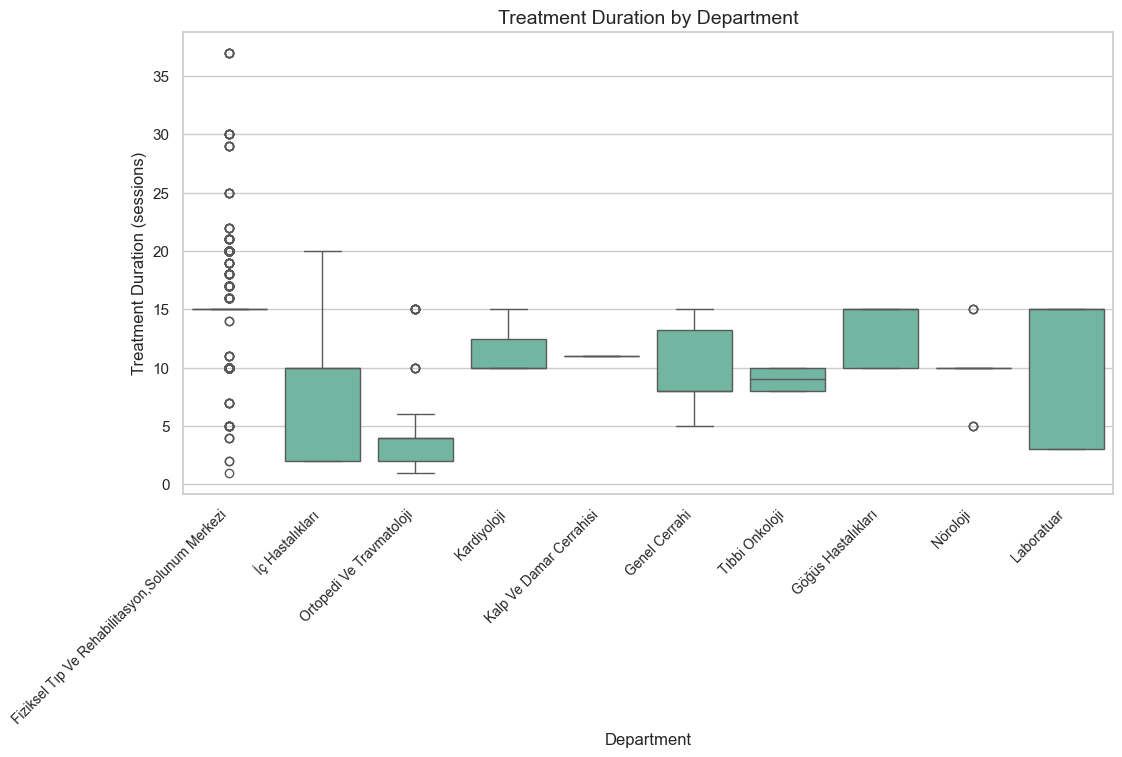

In [11]:
#department vs treatment duration
plt.figure(figsize=(12, 6))
sns.boxplot(x="Bolum", y="TedaviSeans_Sayisi", data=df)
plt.title("Treatment Duration by Department")
plt.xlabel("Department")
plt.ylabel("Treatment Duration (sessions)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

<Axes: xlabel='KanGrubu', ylabel='count'>

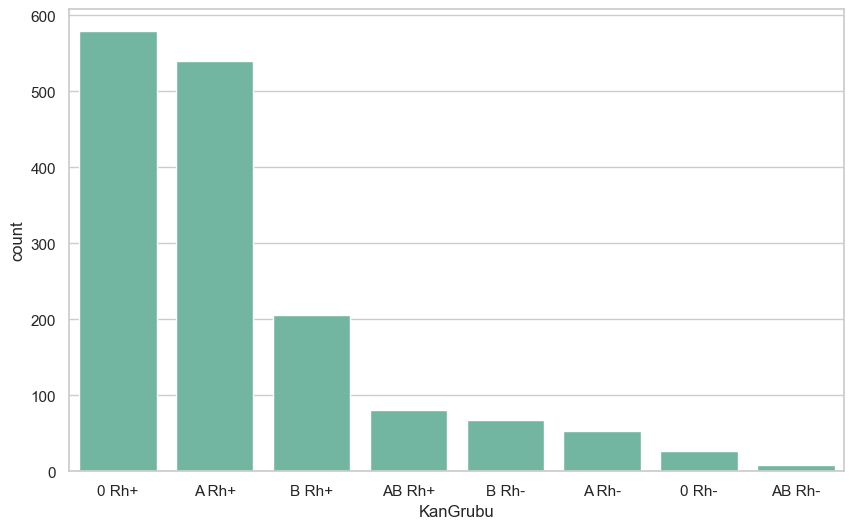

In [12]:
#'KanGrubu' column distribution
sns.countplot(x="KanGrubu", data=df, order=df["KanGrubu"].value_counts().index)

<Axes: xlabel='Uyruk', ylabel='count'>

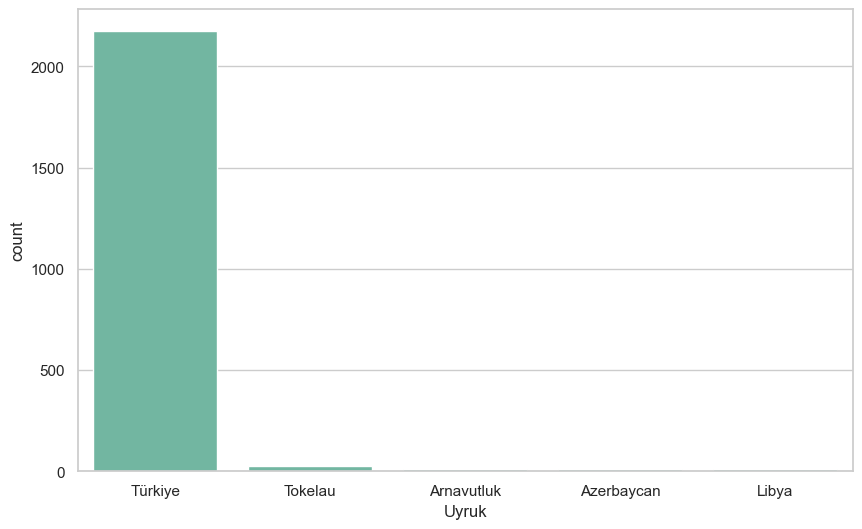

In [13]:
#'Uyruk' column distribution
sns.countplot(x="Uyruk", data=df, order=df["Uyruk"].value_counts().index)

## Feature Engineering

Standardizing the data by removing leading and trailing spaces, converting to lowercase, and reducing multiple spaces to a single space. The reason for this is to simplify our work during data preprocessing by ensuring uniformity in the data.

In [14]:
def clean_text(x):
    if isinstance(x, str):
        x = x.strip()
        x = x.lower()
        x = re.sub(r'\s+', ' ', x)
        return x
    return x

df = df.applymap(clean_text)

In [15]:
#removing duplicate rows
df = df.drop_duplicates()

In [16]:
#filling the missing data with duplicate patient records and completing part of it
df = df.groupby("HastaNo").apply(lambda g: g.ffill().bfill()).reset_index(drop=True)

In [17]:
df.isnull().sum()

HastaNo                 0
Yas                     0
Cinsiyet               87
KanGrubu              331
Uyruk                   0
KronikHastalik        330
Bolum                   7
Alerji                529
Tanilar                36
TedaviAdi               0
TedaviSuresi            0
UygulamaYerleri        45
UygulamaSuresi          0
TedaviSeans_Sayisi      0
dtype: int64

In [18]:
#filling the remaining few empty columns with 'bilinmiyor' (unknown) and 'yok' (none)
for col in ['Bolum', 'UygulamaYerleri','Tanilar','Cinsiyet','KanGrubu']:
    df[col] = df[col].fillna('bilinmiyor')

df['KronikHastalik'] = df['KronikHastalik'].fillna('yok')
df['Alerji'] = df['Alerji'].fillna('yok')

In [19]:
df.isnull().sum()

HastaNo               0
Yas                   0
Cinsiyet              0
KanGrubu              0
Uyruk                 0
KronikHastalik        0
Bolum                 0
Alerji                0
Tanilar               0
TedaviAdi             0
TedaviSuresi          0
UygulamaYerleri       0
UygulamaSuresi        0
TedaviSeans_Sayisi    0
dtype: int64

Defining a function that processes a DataFrame to separate multi-label data and allergy information. It converts strings with multiple values into lists and then uses MultiLabelBinarizer to create binary columns for each unique label. Additionally, it adds two columns to indicate the presence or absence of allergies, making the data ready for analysis.

In [20]:
def encode_multi_and_allergy(df, multi_label_columns, allergy_column="Alerji"):
    df_encoded = df.copy()
    
    split_to_list = lambda x: [] if pd.isna(x) else [t.strip() for t in re.sub(r'[,+-]', ',', str(x)).split(',') if t.strip()]
    
    for col in multi_label_columns + [allergy_column]:
        col_list = col + "_list"
        df_encoded[col_list] = df_encoded[col].apply(lambda x: [] if pd.isna(x) or str(x).lower()=="yok" else split_to_list(x))
        mlb = MultiLabelBinarizer()
        encoded_df = pd.DataFrame(
            mlb.fit_transform(df_encoded[col_list]),
            columns=[f"{col}_{c}" for c in mlb.classes_],
            index=df_encoded.index
        )
        df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
        df_encoded.drop(col_list, axis=1, inplace=True)
    
    alerji_cols = [c for c in df_encoded.columns if c.startswith(allergy_column + "_")]
    df_encoded["Alerji_var"] = (df_encoded[alerji_cols].sum(axis=1) > 0).astype(int)
    df_encoded["Alerji_yok"] = (df_encoded["Alerji_var"] == 0).astype(int)
    
    df_encoded.drop(columns=[allergy_column], inplace=True)
    return df_encoded

multi_label_columns = ['Tanilar', 'TedaviAdi', 'KronikHastalik']
df_encoded = encode_multi_and_allergy(df, multi_label_columns)

In [21]:
df_encoded.shape

(1273, 555)

In [22]:
#changing the name of the UygulamaSuresi column and extracting only the numeric value within it
df_encoded.rename(columns={"UygulamaSuresi": "UygulamaSuresi_(dakika)"}, inplace=True)
df_encoded["UygulamaSuresi_(dakika)"] = df_encoded["UygulamaSuresi_(dakika)"].str.extract(r'(\d+)').astype(float)

In [23]:
df_encoded.head(3)

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi_(dakika),TedaviSeans_Sayisi,Tanilar_'dorsalji̇,Tanilar_19,Tanilar_akromiyoklavikuler eklem burkulma ve gerilmesi,Tanilar_akut apandisit,Tanilar_akut peptik ülser,Tanilar_algonörodistrofi,Tanilar_allerjik rinit,Tanilar_alt ekstremite mononöropatileri,Tanilar_anksiyete bozukluğu,Tanilar_anüs ve rektumun diğer tanımlanmış hastalıkları,Tanilar_aort stenozu,Tanilar_arti̇küler kikirdak di̇ğer bozukluklari,Tanilar_artroz,Tanilar_astım,Tanilar_aterosklerotik kardiyovasküler hastalık,Tanilar_atrial fibrilasyon ve flutter,Tanilar_ayak bileği hariç,Tanilar_ayak bileği ve ayak,Tanilar_ayak bileği ve ayak düzeyinde derin peroneal sinir yaralanması,Tanilar_ayak bileği ve ayak düzeyinde eklem ve ligamentlerin çıkık,Tanilar_ayak bileği ve ayak düzeyinde kas ve tendon yaralanması,Tanilar_ayak bileği ve ayağın diğer ve tanımlanmamış yaralanmaları,Tanilar_ayak bileği ve ayağın yüzeysel yaralanması,Tanilar_ayak kırığı,Tanilar_ayak ve ayak bileği,Tanilar_aşil tendiniti,Tanilar_aşil tendon yaralanması,Tanilar_bacak,Tanilar_baldır düzeyinde peroneal sinir yaralanması,Tanilar_baş ağrısı,Tanilar_başka yerde sınıflanmamış,Tanilar_başka yerde sınıflanmış diğer hastalıklarda,Tanilar_başka yerde sınıflanmış hastalıklarda,Tanilar_bel ağrısı,Tanilar_bell palsisi,Tanilar_benign prostat hiperplazisi,Tanilar_beyincik malign neoplazmı,Tanilar_bilateral,Tanilar_bilinmiyor,Tanilar_birden fazla yer,Tanilar_birinci karpometakarpal eklemin artrozu,Tanilar_biseps diğer kısımlarının kas ve tendon yaralanması,Tanilar_bisipital tendinit,Tanilar_bi̇rden fazla yer,Tanilar_boyun ağrısı,Tanilar_bronş ve akciğer malign neoplazmı,Tanilar_burkulma,Tanilar_burkulma ve gerilmesi,Tanilar_burun kemiklerinin kırığı,Tanilar_böbrek yetmezlikleri,Tanilar_covid,Tanilar_deliryum,Tanilar_demans üzerine eklenen,Tanilar_demans üzerine eklenmeyen,Tanilar_dermatofitoz,"Tanilar_di""ğer",Tanilar_dirsek eklem ve ligamentlerinin çıkık,Tanilar_dirsek çıkığı,Tanilar_dispne,Tanilar_diyabetes mellitüs,Tanilar_diz (anterior) (posterior) çapraz ligament burkulma ve gerilmesi,Tanilar_dizin diğer bursiti,Tanilar_dizin iç bozukluğu,Tanilar_diğer,Tanilar_diğer radikulopati ile,Tanilar_diğer sendromları,Tanilar_diğer tanımlanmış,Tanilar_diğer yumuşak doku bozuklukları,Tanilar_diğe­r,Tanilar_di̇ğer,Tanilar_dorsalji,Tanilar_dorsalji̇,Tanilar_düşme,Tanilar_eklem ağrısı,Tanilar_eklem diğer bozuklukları,Tanilar_eklem kontraktürü,Tanilar_eklem ­ağrısı,Tanilar_eklemde ağrı,Tanilar_eklemin diğer instabilitesi,Tanilar_eklemin kontraktürü,Tanilar_eklem﻿ ağrisi,Tanilar_ekstremite ağrısı,Tanilar_el,Tanilar_el bileği ve el düzeyinde baş parmak ekstansör kas ve tendonunun yaralanmas_x000d_ı,Tanilar_el bileği ve el düzeyinde baş parmak ekstansör kas ve tendonunun yaralanması,Tanilar_el bileği ve el düzeyinde baş parmak intirinsik kas ve tendonunun yaralanması,Tanilar_el bileği ve el düzeyinde eklem ve ligame`ntlerin çıkık,Tanilar_el bileği ve el düzeyinde eklem ve ligamentlerin çıkık,Tanilar_el bileği ve el düzeyinde kas ve tendon yaralanması,Tanilar_epilepsi,Tanilar_esansiyel (primer) hipertansiyon,Tanilar_eski yırtık veya yaralanmaya bağlı,Tanilar_fekal inkontinans,Tanilar_femur diğer kısımlarının kırıkları,Tanilar_femur kırığı,Tanilar_femur şaft kırığı,Tanilar_femurun longitudinal redüksiyon defekti,Tanilar_fibromiyalji,Tanilar_fobik anksiyete bozukluğu,Tanilar_ganglion,Tanilar_genel tıbbi muayene,Tanilar_gonartroz [diz ekleminin artrozu],Tanilar_halluks valgus (kazanılmış),Tanilar_hemartroz,Tanilar_hematüri,Tanilar_hemoraji veya enfarktüs olarak tanımlanmamış,Tanilar_hemoraji veya perforasyon yok,Tanilar_hipotroidizm,Tanilar_humerus alt uç kırığı,Tanilar_humerus üst uç kırığı,Tanilar_i̇liotibial band sendromu,Tanilar_i̇nme,"Tanilar_i̇ntervertebra""l disk bozuklukları",Tanilar_i̇ntervertebral disk bozuklukları,Tanilar_i̇nterverteb﻿ral disk bozuklukları,Tanilar_i̇ntrehepatik safra yolu karsinomu,Tanil

In [24]:
#cleaning up the spaces in the names of the newly created columns from encoding for the model to function properly
df_encoded.columns = df_encoded.columns.str.replace(r"[^\w]", "_", regex=True)

In [25]:
df_encoded.columns

Index(['HastaNo', 'Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik',
       'Bolum', 'Tanilar', 'TedaviAdi', 'TedaviSuresi',
       ...
       'Alerji_gri_pi_n', 'Alerji_novalgin', 'Alerji_polen', 'Alerji_sucuk',
       'Alerji_toz', 'Alerji_voltaren', 'Alerji_volteren',
       'Alerji_yer_fıstığı', 'Alerji_var', 'Alerji_yok'],
      dtype='object', length=555)

## Modelling with Machine Learning and Deep Learning

In [26]:
#one-hot encoding
categorical_cols = ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum", "UygulamaYerleri"]
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

#train-test-split
X = df_encoded.drop(columns=["TedaviSuresi", "TedaviSeans_Sayisi","HastaNo",'Tanilar', 'TedaviAdi', 'KronikHastalik'])
y = df_encoded["TedaviSeans_Sayisi"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Machine Learning

In [27]:
#defining the models and performing machine learning using three types of algorithms
models = {
    "RandomForest": RandomForestRegressor(n_estimators=500, max_depth=15),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=5),
    "HistGradientBoosting": HistGradientBoostingRegressor(max_iter=500, learning_rate=0.05, max_depth=5)
}

results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    mean_cv = np.mean(cv_scores)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)

    results[name] = {"CV Mean R2": round(mean_cv, 3),
                     "R2": round(test_r2, 3),
                     "MAE": round(test_mae, 3)}

results_df = pd.DataFrame(results).T
print(results_df)

                      CV Mean R2     R2    MAE
RandomForest               0.669  0.729  0.989
GradientBoosting           0.841  0.827  0.742
HistGradientBoosting       0.631  0.665  1.393


R2: 0.827
MAE: 0.732


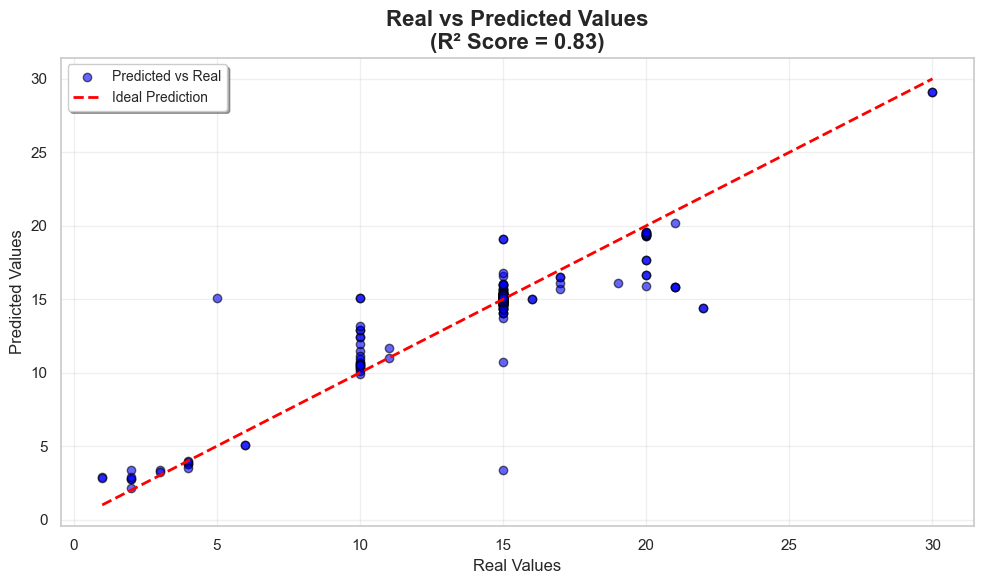

In [28]:
#learning again with the best resulted algorithm
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=5)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

#performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R2: {r2:.3f}")
print(f"MAE: {mae:.3f}")

#real vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.6, edgecolor='k', label='Predicted vs Real')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')
plt.title(f"Real vs Predicted Values\n(R² Score = {r2:.2f})", fontsize=16, fontweight='bold')
plt.xlabel('Real Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(loc='upper left', fontsize=10, shadow=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

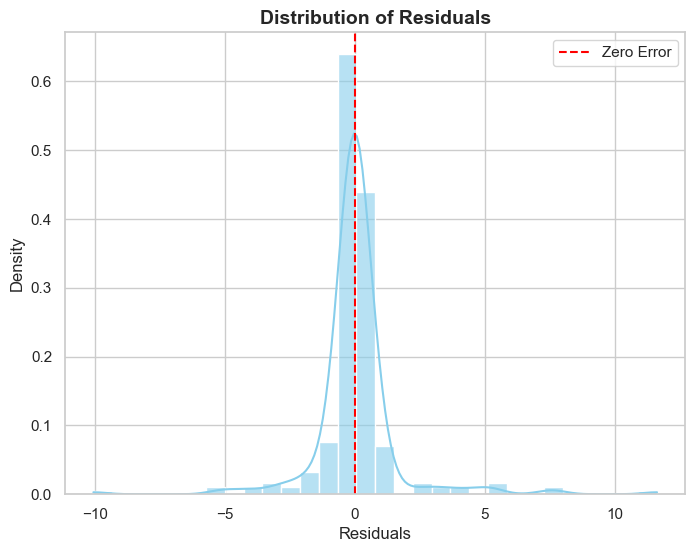

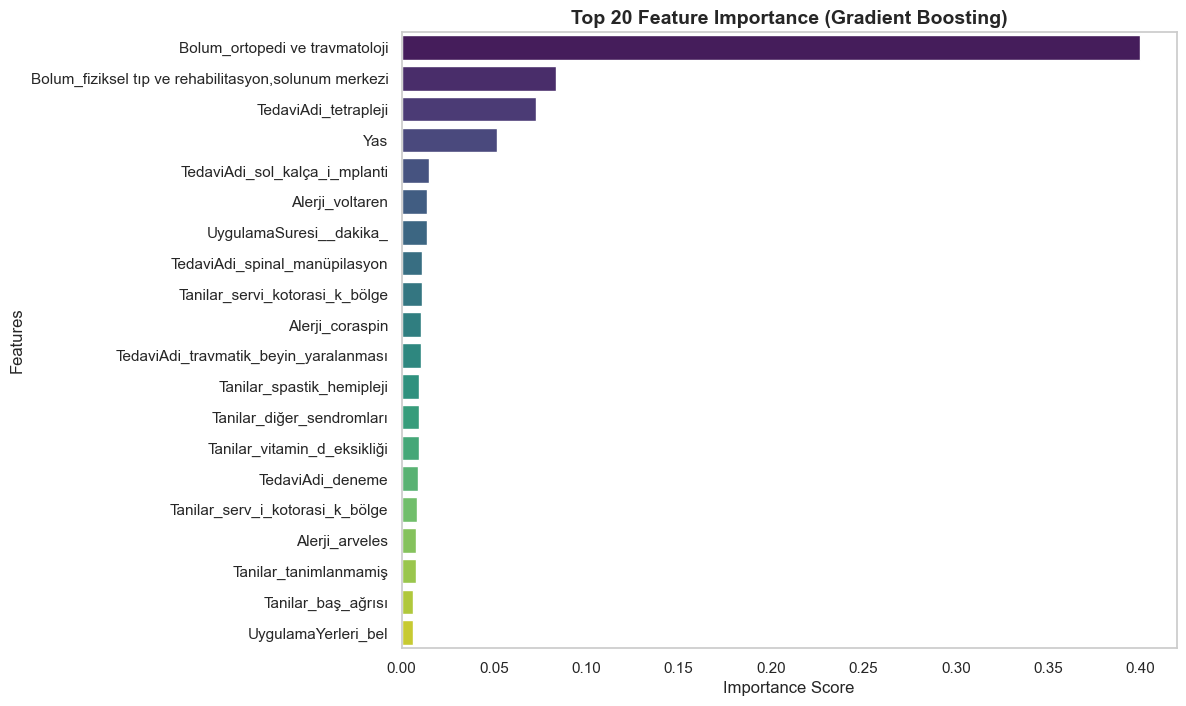

In [29]:
#residual distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='skyblue', stat='density', alpha=0.6)
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Residuals", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

#feature importance
importances = pd.Series(gb_model.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("Top 20 Feature Importance (Gradient Boosting)", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x')
plt.show()

### Deep Learning

In [30]:
#scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#building the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],),
          kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.15),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(1)
])

#compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='mean_absolute_error',
              metrics=['mean_squared_error'])

#early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [31]:
#fitting the model
history = model.fit(X_train_scaled, y_train,validation_split=0.2,epochs=300,batch_size=64,callbacks=[early_stop],verbose=0)

In [32]:
#predicting and checking the results
y_pred = model.predict(X_test_scaled).flatten()
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2:", r2)
print("MAE:", mae)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R2: 0.7622865457093054
MAE: 0.7737547547209497


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       310,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,430,021 (5.46 MB)

 Trainable params: 476,161 (1.82 MB)

 Non-trainable params: 1,536 (6.00 KB)

 Optimizer params: 952,324 (3.63 MB)

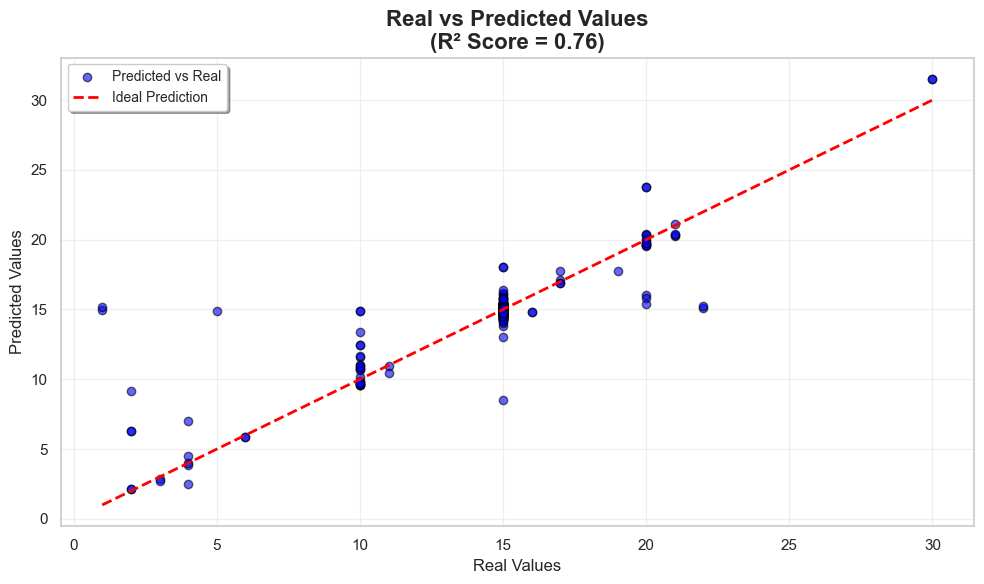

In [34]:
#real vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.6, edgecolor='k', label='Predicted vs Real')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')
plt.title(f"Real vs Predicted Values\n(R² Score = {r2:.2f})", fontsize=16, fontweight='bold')
plt.xlabel('Real Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(loc='upper left', fontsize=10, shadow=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

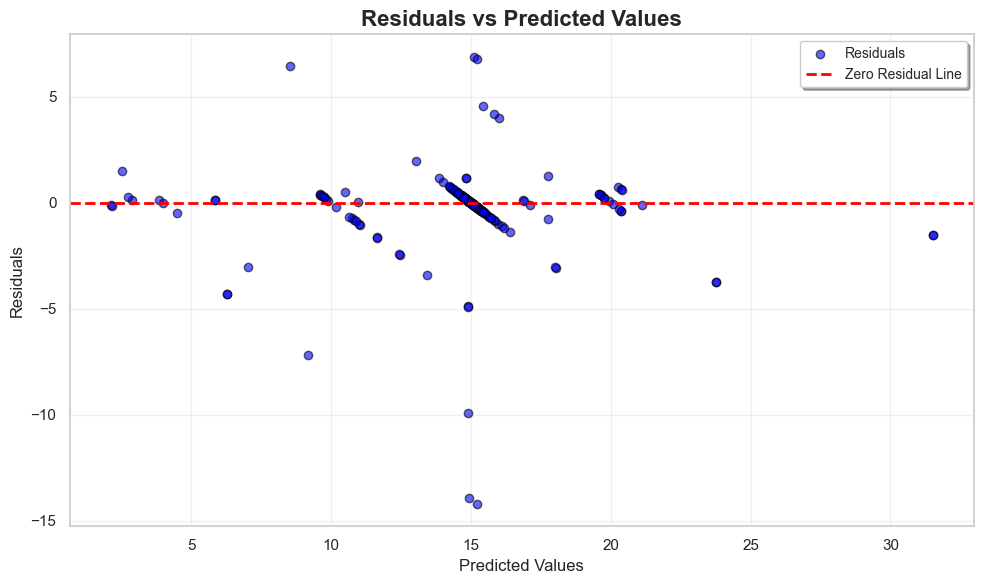

In [35]:
#residuals vs. predicted values plot
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6, edgecolor='k', label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.title("Residuals vs Predicted Values", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.legend(loc='upper right', fontsize=10, shadow=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Conclusion  

In this study, we explored a **clinical dataset of 2,235 patient records** to predict **treatment duration**.  
Our workflow included **data preprocessing, categorical encoding, exploratory analysis, feature engineering, and model development**.  

The results show that:

- **Gradient Boosting** performed best among traditional ML models, achieving a **CV Mean R² of 0.841**, **R² of 0.827**, and the lowest **MAE (0.742)**.  
- **Random Forest** delivered a solid R² (0.729) but higher MAE compared to Gradient Boosting.  
- **HistGradientBoosting** underperformed relative to the others, with both lower R² and higher error.  
- The **Deep Learning model** achieved **R² ≈ 0.76** and **MAE ≈ 0.77**, performing close to Gradient Boosting but not surpassing it.  

**Overall**, Gradient Boosting emerged as the most reliable model for predicting treatment duration in this dataset, combining strong predictive power with lower error.  
